In [1]:
import numpy as np
import and_logic_generator as and_gen
import and_gate_pipeline as pipeline
import matplotlib.pyplot as plt

# reload modules every 2 seconds
%load_ext autoreload
%autoreload 2

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)


In [3]:
# Prepare samples
n = 2000
x, y = and_gen.generate_uniform_samples(
    n=n, 
    threshold=0, 
    radius=1.0,
    logic='xor')


In [4]:
and_gate_pipeline = pipeline.LogicGatePipeline(x, y, logic='xor')
and_gate_pipeline.random_state = random_state


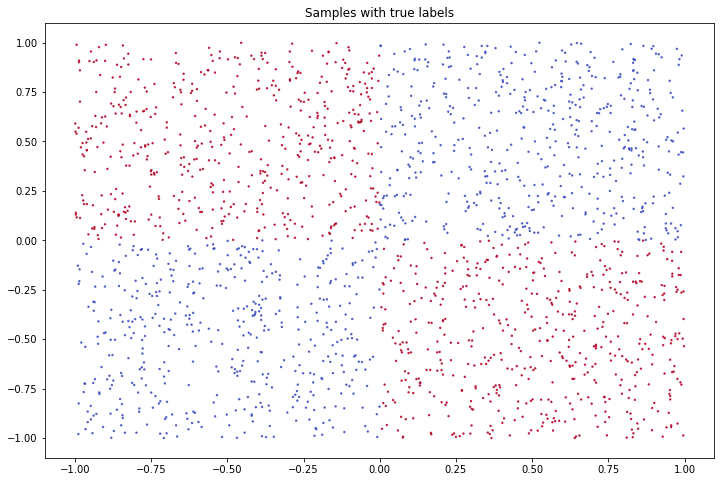

In [5]:
# Parameters for figures
figsize = np.array(plt.rcParams["figure.figsize"]) * 2
x_max = np.amax(x, axis=0) * 1.1
x_min = np.amin(x, axis=0) * 1.1

and_gate_pipeline.plot_data(
    figsize=figsize, xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [6]:
# 80:20 split on training and test sets
and_gate_pipeline.train_test_split(0.2)

Train test split: 0.80:0.20


In [7]:
# Parameters for SVM
gamma='scale'
C=100
shift=[[-0.5, -0.5]]

and_gate_pipeline.fit_svm_model(gamma=gamma, C=C, shift=shift)


With gamma = scale and C = 100
Accuracy on train set = 99.5625%
Accuracy on test set  = 99.2500%
Passed basic test


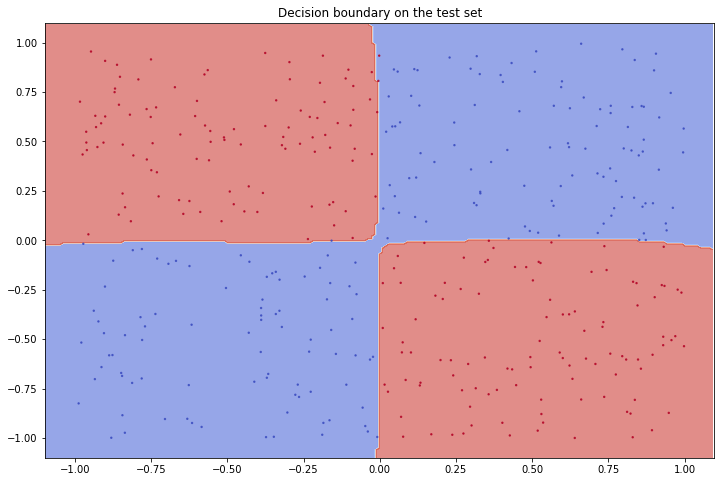

In [8]:
and_gate_pipeline.plot_prediction(
    figsize, h=0.01, 
    mesh_xlim=[x_min[0], x_max[0]], mesh_ylim=[x_min[1], x_max[1]], 
    xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [9]:
and_gate_pipeline.model.get_params()


{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
# Parameter for stepping size of Adversarial Examples
epsilon = 0.006
max_epoch = 3000

and_gate_pipeline.generate_adversarial_examples(
    epsilon=epsilon, max_epoch=max_epoch)


Negative mean = [0.0153, 0.0302]
Positive mean = [0.0261, -0.0172]
Completed after 3001 epoch...
Misclassified = 278
Misclassified negative = 216 (54.0000%)
Misclassified positive = 62 (15.5000%)
Found 278 Adversarial Examples out of 400. 69.5000% successful rate


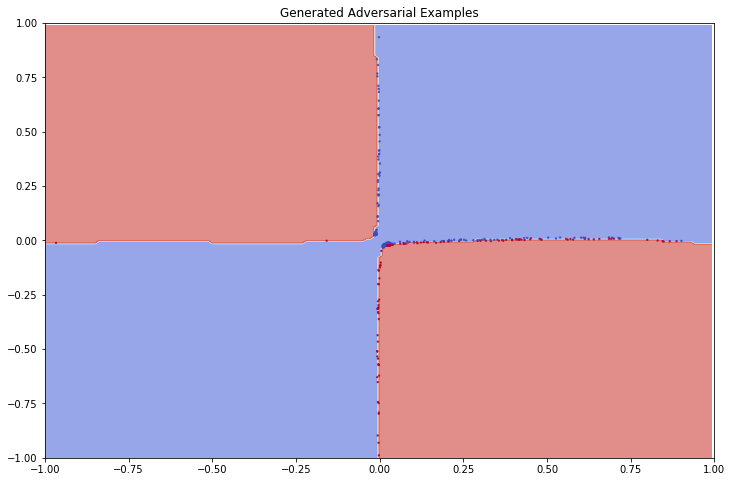

In [11]:
and_gate_pipeline.plot_adversarial_examples(
    figsize, h=0.01,
    mesh_xlim=[-1.0, 1.0], mesh_ylim=[-1.0, 1.0],
    xlim=[-1.0, 1.0], ylim=[-1.0, 1.0])


In [12]:
# Parameters for Applicability Domain
k = 9
zeta0 = 0.2
zeta1 = 0.6

and_gate_pipeline.run_applicability_domain(
    zeta0=zeta0, zeta1=zeta1, k=k)



---------- Applicability ---------------
Pass rate = 100.0000%

---------- Reliability -----------------

In 0 class:
Threshold = 0.0647
Average mean = 0.0673
Passed indices:
0, 1, 3, 5, 7, 13, 14, 20, 22, 27, 31, 32, 38, 39, 40, 41, 42, 46, 51, 52, 54, 55, 56, 58, 62, 65, 67, 68, 73, 79, 80, 81, 88, 90, 92, 97, 100, 103, 104, 107, 108, 114, 117, 119, 124, 125, 126, 128, 133, 136, 138, 142, 144, 148, 155, 158, 162, 170, 172, 188, 189, 192, 193, 194, 196, 198, 201, 204, 206, 207, 208, 210, 216, 221, 224, 230, 235, 242, 245, 247, 252, 253, 254, 257, 259, 260, 261, 264, 276, 282, 283, 285, 286, 287, 288, 289, 290, 295, 301, 302, 311, 315, 316, 326, 328, 330, 333, 334, 337, 338, 339, 347, 355, 357, 360, 361, 368, 370, 372, 373, 375, 377, 380, 381, 385, 386, 390, 394, 395, 396, 398

In 1 class:
Threshold = 0.0691
Average mean = 0.0835
Passed indices:
66, 169, 277, 349
Distance of c0 in training set:
Mean               = 0.0617
Standard deviation = 0.0149
Threshold          = 0.0647

Distan

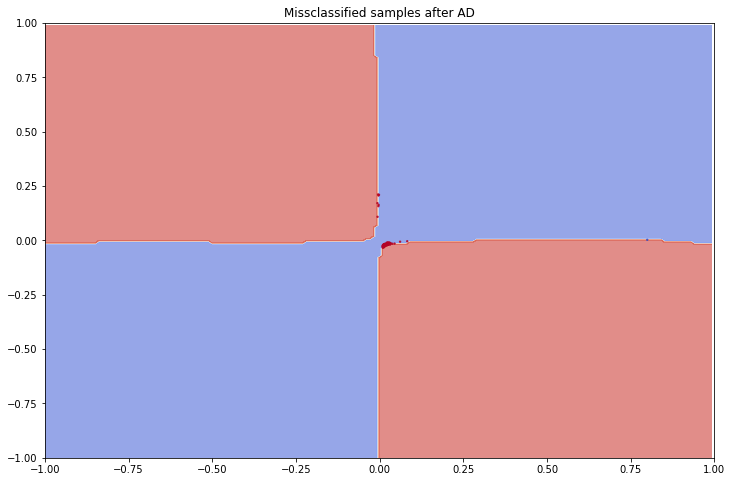

In [13]:
and_gate_pipeline.plot_after_ad(
    figsize, h=0.01,
    mesh_xlim=[-1.0, 1.0], mesh_ylim=[-1.0, 1.0],
    xlim=[-1.0, 1.0], ylim=[-1.0, 1.0])